In [44]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import math
import soundfile as sf
from scipy import signal
import scipy

In [254]:
import librosa.display

In [245]:
my_sig, sr = librosa.load('my voice.wav' , sr = 16000)
window_length = 512
shift = int(window_length / 2)
my_stft = matrix_STFT(my_sig, window_length, shift)

In [246]:
my_istft = ISTFT(my_stft, window_length, shift)

<ipython-input-242-97c77225cf16>:38: ComplexWarning: Casting complex values to real discards the imaginary part
  window_list[idx:idx+window_length] = ISTFT[i]


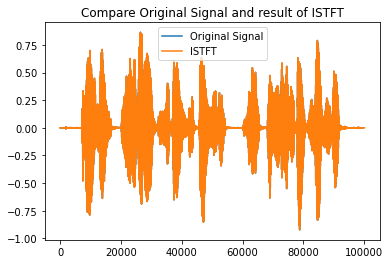

In [249]:
plt.plot(my_sig, label='Original Signal')
plt.plot(my_istft, label='ISTFT')
plt.title('Compare Original Signal and result of ISTFT')
plt.legend()

Text(0.5, 1.0, "My friend's voice (sr=16000)")

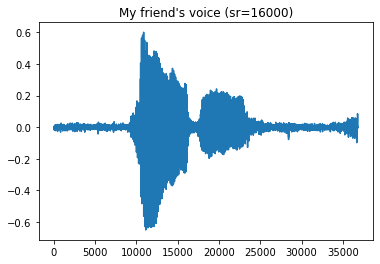

In [298]:
plt.plot(JCT_sig)
plt.title("My friend's voice (sr=16000)")

In [252]:
my_libstft =  librosa.stft(my_sig, n_fft=window_length, hop_length=shift, window='hamming')
print(my_libstft.shape)
my_half = (my_stft[:,:257]).T
print(my_half.shape)

(257, 390)
(257, 390)


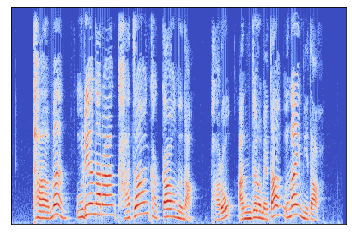

In [255]:
my_log_spectrogram = librosa.amplitude_to_db(my_half)
librosa.display.specshow(my_log_spectrogram, sr=sr, hop_length=shift)

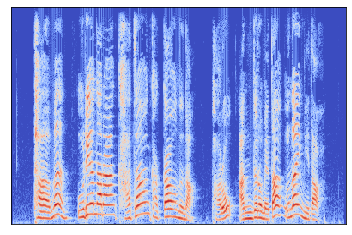

In [256]:
my_lib_log_spectrogram = librosa.amplitude_to_db(my_libstft)
librosa.display.specshow(my_lib_log_spectrogram, sr=sr, hop_length=shift)

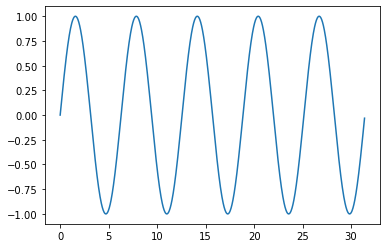

In [257]:
t = np.linspace(0, 10*np.pi, 1001)[:-1]
sin = np.sin(t)
plt.plot(t,sin)

In [260]:
sin_stft = matrix_STFT(sin, 32, 16)
sin_libstft =  librosa.stft(sin, n_fft=32, hop_length=16, window='hamming')
print(sin_libstft.shape)
sin_half = (sin_stft[:,:17]).T
print(sin_half.shape)

(17, 63)
(17, 63)


C:\Users\yegee\anaconda3\lib\site-packages\librosa\core\spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


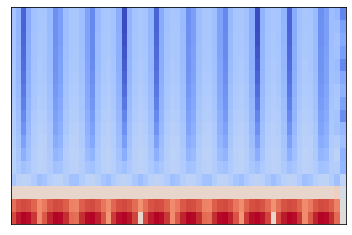

In [263]:
sin_log_spectrogram = librosa.amplitude_to_db(sin_half)
librosa.display.specshow(sin_log_spectrogram, sr=256, hop_length=16)

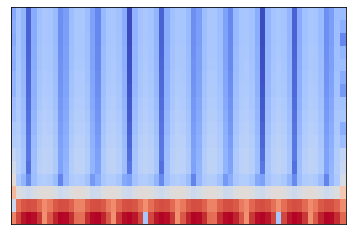

In [264]:
sin_lib_log_spectrogram = librosa.amplitude_to_db(sin_libstft)
librosa.display.specshow(sin_lib_log_spectrogram, sr=256, hop_length=16)

In [265]:
JCT_sig, sr = librosa.load('JCT.wav' , sr = 16000)
window_length = 512
shift = int(window_length / 2)
JCT_stft = matrix_STFT(JCT_sig, window_length, shift)

In [266]:
JCT_libstft =  librosa.stft(JCT_sig, n_fft=window_length, hop_length=shift, window='hamming')
print(JCT_libstft.shape)
JCT_half = (JCT_stft[:,:257]).T
print(JCT_half.shape)

(257, 144)
(257, 144)


C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


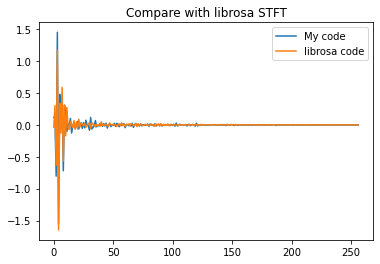

In [285]:
plt.plot(JCT_half[:,10],label='My code')
plt.plot(JCT_libstft[:,10],label='librosa code')
plt.title('Compare with librosa STFT')
plt.legend()

C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


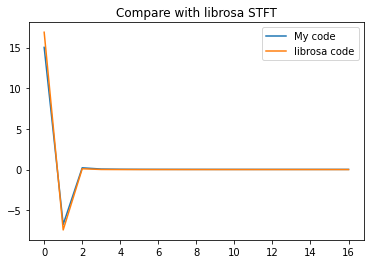

In [293]:
plt.plot(sin_half[:,3],label='My code')
plt.plot(sin_libstft[:,3],label='librosa code')
plt.title('Compare with librosa STFT')
plt.legend()

In [304]:
sin_istft = matrix_ISTFT(sin_stft, 32, 16)
JCT_istft = matrix_ISTFT(JCT_stft, 512, 256)

<ipython-input-262-352f5a044e69>:38: ComplexWarning: Casting complex values to real discards the imaginary part
  window_list[idx:idx+window_length] = ISTFT[i]


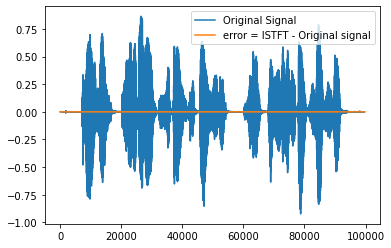

In [313]:
my_error = my_istft[:99670] - my_sig
plt.plot(my_sig, label='Original Signal')
plt.plot(my_error,label='error = ISTFT - Original signal')
plt.legend()

<ipython-input-240-1008b63c2f83>:40: ComplexWarning: Casting complex values to real discards the imaginary part
  window_list[idx:idx+window_length] = IMSTFT[i] * window


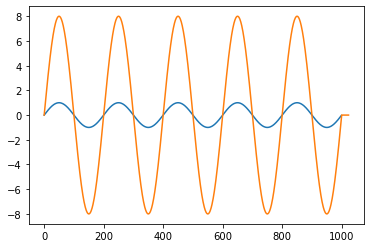

In [316]:
mask = 8
sin_mstft = sin_stft * mask
sin_result = GriffinLim(sin_mstft, 32, 16)
plt.plot(sin)
plt.plot(sin_result)

C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


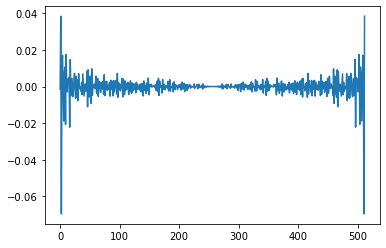

C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


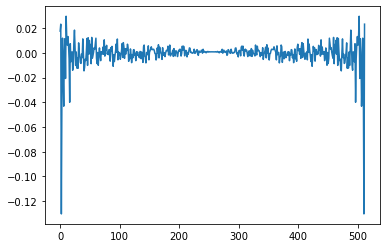

In [322]:
my_not_window = not_window(my_sig, 512, 256)


plt.plot(my_stft[4])
plt.show()
plt.plot(my_not_window[4])

C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


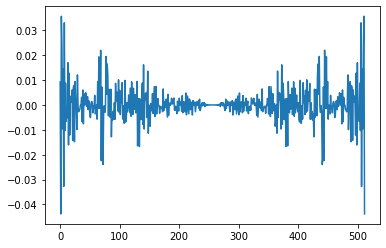

C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


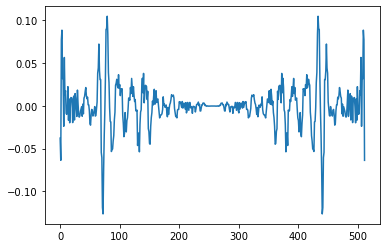

In [326]:
plt.plot(my_stft[7])
plt.show()
plt.plot(my_not_window[7])

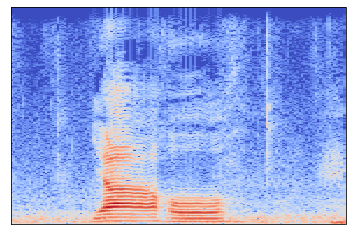

In [267]:
JCT_log_spectrogram = librosa.amplitude_to_db(JCT_half)
librosa.display.specshow(JCT_log_spectrogram, sr=sr, hop_length=shift)

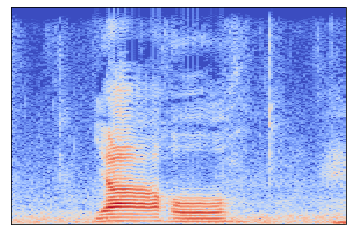

In [268]:
JCT_lib_log_spectrogram = librosa.amplitude_to_db(JCT_libstft)
librosa.display.specshow(JCT_lib_log_spectrogram, sr=sr, hop_length=shift)

In [ ]:
print()

In [48]:
def matrix_STFT(sig, window_length, shift):
    
    ### Zero Padding
#     zero = np.zeros([int(window_length - (shift+1)) + int(math.ceil(len(sig)/shift)*shift-(len(sig)-1))])
#     sig = np.concatenate([sig,zero],axis=None)
#     print(zero.shape)
    
    ### make exponential
    array_exp = []
    for k in range(0, window_length,1):
        globals()['exp{}'.format(k)] = []
        
        for l in range(0, window_length,1):
            value = (((2*np.pi)*k*l)/window_length )*1j
            exp = np.exp(value)
            globals()['exp{}'.format(k)].append(exp)
            
        array_exp.append(globals()['exp{}'.format(k)])

    array_exp = np.array(array_exp)    
    array_exp = array_exp.T
    
    ### Matrix Calculation
    STFT = []
    window = scipy.signal.get_window('hamming',window_length)

    for idx in range(0, len(sig)-(window_length-1), shift):
        print(idx)
        data = sig[idx:idx+window_length] * window
        F = data @ array_exp
        STFT.append(F)

    STFT = np.array(STFT)
    return STFT
    

In [22]:
def not_window(sig, window_length, shift):
    ### Zero Padding
#     zero = np.zeros([int(window_length - (shift+1)) + int(math.ceil(len(sig)/shift)*shift-(len(sig)-1))])
#     sig = np.concatenate([sig,zero],axis=None)
    
    ### make exponential
    array_exp = []
    for k in range(0, window_length,1):
        globals()['exp{}'.format(k)] = []
        
        for l in range(0, window_length,1):
            value = (((2*np.pi)*k*l)/window_length )*1j
            exp = np.exp(value)
            globals()['exp{}'.format(k)].append(exp)
            
        array_exp.append(globals()['exp{}'.format(k)])

    array_exp = np.array(array_exp)    
    array_exp = array_exp.T
    
    ### Matrix Calculation
    STFT = []

    for idx in range(0, len(sig)-(window_length-1), shift):
        data = sig[idx:idx+window_length]
        F = data @ array_exp
        STFT.append(F)

    STFT = np.array(STFT)
    return STFT
    

In [28]:
def first_STFT(sig, window_length, shift):
    
    ### Zero Padding
#     zero = np.zeros([int(window_length - (shift+1)) + int(math.ceil(len(sig)/shift)*shift-(len(sig)-1))])
#     sig = np.concatenate([sig,zero],axis=None)
    
    window = np.hamming(window_length)
    STFT = []
    for i in range(0, len(sig)-(window_length-1), shift):
        idx_list = []
        for idx in range(i,i+window_length,1):
            idx_list.append(idx)
        globals()['F{}'.format(i)] = []
        for k in range(0, window_length,1):
            F = 0
            for l, idx in enumerate(idx_list):
                value = (((2*np.pi)*k*l)/window_length )*1j
                F = F + (window[l]*sig[idx]*np.exp(value) )
            globals()['F{}'.format(i)].append(F)
            
        globals()['F{}'.format(i)] = np.array(globals()['F{}'.format(i)])
        
        STFT.append(globals()['F{}'.format(i)])
    
    STFT = np.array(STFT)
    return STFT

In [240]:
def GriffinLim(MSTFT, window_length, shift):

    ### make exponential
    array_exp_i = []
    
    for l in range(0, window_length,1):
        globals()['exp_i{}'.format(l)] = []
        
        for k in range(0, window_length,1):
            value = -1j * (((2*np.pi)*k*l)/window_length)
            exp_i = np.exp(value)
            globals()['exp_i{}'.format(l)].append(exp_i)
            
        array_exp_i.append(globals()['exp_i{}'.format(l)])

    array_exp_i = np.array(array_exp_i)    
    array_exp_i = array_exp_i.T
    
    ### matrix calculation
    IMSTFT = []
    window = np.hamming(window_length)

    for m in range(0, len(MSTFT),1):
        x = MSTFT[m] @ array_exp_i
        IMSTFT.append(x)

    IMSTFT = np.array(IMSTFT) / window_length
    
    ### Zero padding to Griffin-Lim
    window_IMSTFT = []
    idx_list = []
    sq_window = []
    window = np.hamming(window_length)

    for m in range(0, ((len(MSTFT)+1)*shift)-(window_length-1), shift):
        idx_list.append(m)   

    for i, idx in enumerate(idx_list):
        window_list = np.zeros((len(MSTFT)+1)*shift)
        window_list[idx:idx+window_length] = IMSTFT[i] * window
        window_IMSTFT.append(window_list)
    
        sq_window_list = np.zeros((len(MSTFT)+1)*shift)
        sq_window_list[idx:idx+window_length] = window**2
        sq_window.append(sq_window_list)
    
    window_IMSTFT = np.array(window_IMSTFT)
    sq_window = np.array(sq_window)

    ### Calculate griffin-lim algorithm
    up_sum = 0
    down_sum = 0
    for i in range(0, len(window_IMSTFT), 1):
        up_sum = up_sum + window_IMSTFT[i]
        down_sum = down_sum + sq_window[i]
    Result = up_sum / down_sum

    return Result


In [241]:
def first_ISTFT(STFT, window_length, shift):

    ISTFT = []
    window = np.hamming(window_length)
    array_window = np.tile(window,(len(STFT),1))
    STFT = STFT / array_window
    for m in range(0, len(STFT),1):
        globals()['y{}'.format(m)] = []
        for l in range(0, window_length,1):
            y = 0
            for k in range(0, window_length,1):
                value = -1j * (((2*np.pi)*k*l)/window_length)
                y = y + ( STFT[m,k]*np.exp(value) )
            y = y / window_length
            globals()['y{}'.format(m)].append(y)
        
        ISTFT.append(globals()['y{}'.format(m)])

    ISTFT = np.array(ISTFT)
    
    ### zero padding of window ot ISTFT
    window_ISTFT = []
    idx_list = []

    for m in range(0, ((len(STFT)+1)*shift)-(window_length-1), shift):
        idx_list.append(m)

    for i, idx in enumerate(idx_list):
        window_list = np.zeros((len(STFT)+1)*shift)
        window_list[idx:idx+window_length] = ISTFT[i]
        window_ISTFT.append(window_list)
    
    window_ISTFT = np.array(window_ISTFT)

    ### Sum window of ISTFT
    Result_ISTFT = 0
    for i in range(0, len(window_ISTFT), 1):
        Result_ISTFT = Result_ISTFT + window_ISTFT[i]

    return Result_ISTFT

In [262]:
def matrix_ISTFT(STFT, window_length, shift):
    ### make exponential
    array_exp_i = []
    
    for l in range(0, window_length,1):
        globals()['exp_i{}'.format(l)] = []
        
        for k in range(0, window_length,1):
            value = -1j * (((2*np.pi)*k*l)/window_length)
            exp_i = np.exp(value)
            globals()['exp_i{}'.format(l)].append(exp_i)
            
        array_exp_i.append(globals()['exp_i{}'.format(l)])

    array_exp_i = np.array(array_exp_i)    
    array_exp_i = array_exp_i.T
    
    ### matrix calculation
    ISTFT = []
    window = np.hamming(window_length)

    for m in range(0, len(STFT),1):
        x = STFT[m] @ array_exp_i
        x = x / window
        ISTFT.append(x)

    ISTFT = np.array(ISTFT) / window_length
    
    ### zero padding of window ot ISTFT
    window_ISTFT = []
    idx_list = []

    for m in range(0, ((len(STFT)+1)*shift)-(window_length-1), shift):
        idx_list.append(m)

    for i, idx in enumerate(idx_list):
        window_list = np.zeros((len(STFT)+1)*shift)
        window_list[idx:idx+window_length] = ISTFT[i]
        window_ISTFT.append(window_list)
    
    window_ISTFT = np.array(window_ISTFT)

    ### Sum window of ISTFT
    Result_ISTFT = 0
    for i in range(0, len(window_ISTFT), 1):
        Result_ISTFT = Result_ISTFT + window_ISTFT[i]

    Result_ISTFT[shift:-shift] = Result_ISTFT[shift:-shift] / 2
    return Result_ISTFT




In [243]:
def IMSTFT(MSTFT, window_length, shift):
    
    ### make exponential
    array_exp_i = []
    
    for l in range(0, window_length,1):
        globals()['exp_i{}'.format(l)] = []
        
        for k in range(0, window_length,1):
            value = -1j * (((2*np.pi)*k*l)/window_length)
            exp_i = np.exp(value)
            globals()['exp_i{}'.format(l)].append(exp_i)
            
        array_exp_i.append(globals()['exp_i{}'.format(l)])

    array_exp_i = np.array(array_exp_i)    
    array_exp_i = array_exp_i.T
    
    ### matrix calculation
    IMSTFT = []
    window = np.hamming(window_length)

    for m in range(0, len(MSTFT),1):
        x = MSTFT[m] @ array_exp_i
        x = x / window
        IMSTFT.append(x)

    IMSTFT = np.array(IMSTFT) / window_length
    
    ### Zero padding of window ot IMSTFT
    window_IMSTFT = []
    idx_list = []

    window = np.hanning(window_length)

    for m in range(0, ((len(MSTFT)+1)*shift)-(window_length-1), shift):
        idx_list.append(m)

    for i, idx in enumerate(idx_list):
    
        window_list = np.zeros((len(MSTFT)+1)*shift)
        window_list[idx:idx+window_length] = IMSTFT[i]
        window_IMSTFT.append(window_list)
    
    window_IMSTFT = np.array(window_IMSTFT)
    
    ### Sum window of IMSTFT
    Result_IMSTFT = 0
    for i in range(0, len(window_IMSTFT), 1):
        Result_IMSTFT = Result_IMSTFT + window_IMSTFT[i]

    return Result_IMSTFT

32


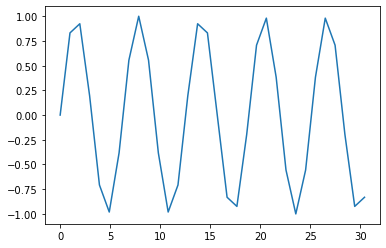

In [7]:
t = np.linspace(0, 10*np.pi,33)[:-1]
sin = np.sin(t)
plt.plot(t,sin)
print(len(sin))

In [49]:
stft = matrix_STFT(sin, 8, 4)
print(stft.shape)
stft = (stft[:,:5]).T
print(stft.shape)

0
4
8
12
16
20
24
(7, 8)
(5, 7)


(5, 9)
[-0.79685818+0.j          1.39842943-1.4668809j  -0.99935268+0.95820473j
  0.01578413-0.05579289j -0.03286359+0.j        ]


C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


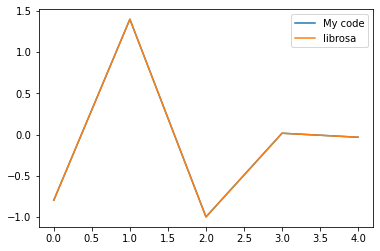

In [55]:
print(stft_lib.shape)
plt.plot(stft[:,0],label='My code')

print(stft_lib[:,1])

plt.plot(stft_lib[:,1],label='librosa')
plt.legend()
# plt.plot(first[:,4],c='b')

In [29]:
first = first_STFT(sin, 8, 4)
first = (first[:,:5]).T
print(first.shape)

(5, 7)


In [10]:
stft_lib = librosa.stft(sin, window='hamming', n_fft=8, hop_length=4, win_length=8)
istft_lib = librosa.istft(stft_lib,window='hamming', hop_length=4, win_length=8)
print(stft_lib.shape)

(5, 9)


[1. 1. 1. 1. 1. 1. 1. 1.] (8,) <class 'numpy.ndarray'>
(5, 7)
(5, 9)


C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


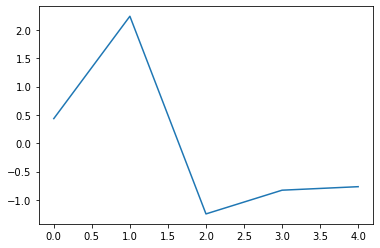

C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


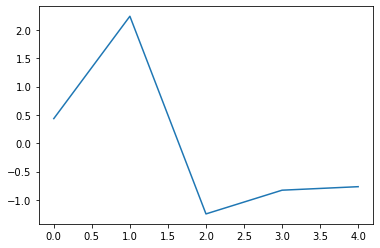

In [25]:
notwindow = np.ones(8)
print(notwindow, notwindow.shape, type(notwindow))
not1 = not_window(sin, 8, 4)
not1 = (not1[:,:5]).T
print(not1.shape)
notlib = librosa.stft(sin, window=notwindow, n_fft=8, hop_length=4, win_length=8)
print(notlib.shape)

plt.plot(not1[:,0])
plt.show()
plt.plot(notlib[:,1])

In [47]:
print(sin[2:5])
a = np.array([1,2,3])
print(sin[2:5] * a)
print(signal.windows.hamming(8))
print('enter')
print(np.hamming(8))
print(scipy.signal.get_window('hamming',8))

[ 0.92387953  0.19509032 -0.70710678]
[ 0.92387953  0.39018064 -2.12132034]
[0.08       0.25319469 0.64235963 0.95444568 0.95444568 0.64235963
 0.25319469 0.08      ]
enter
[0.08       0.25319469 0.64235963 0.95444568 0.95444568 0.64235963
 0.25319469 0.08      ]
[0.08       0.21473088 0.54       0.86526912 1.         0.86526912
 0.54       0.21473088]
